In [1]:
from bertopic import BERTopic
import pandas as pd
import pickle
import umap
import umap.plot
import bokeh.plotting as bpl
from bokeh.io import output_file, show, save
from plot import plot_bokeh

In [2]:
model_path='/media/marcin/Dane/model/'
# model_path='model/'

In [3]:
import psutil
psutil.virtual_memory()

svmem(total=16618618880, available=9655603200, percent=41.9, used=5199073280, free=230215680, active=7758266368, inactive=6619570176, buffers=2419642368, cached=8769687552, shared=1410646016, slab=575205376)

In [5]:
df = pd.read_csv('parsed/corpus/all.csv', index_col=0, na_filter=False)
docs = df.text.to_list()

In [6]:
topic_model = BERTopic.load(f'{model_path}2015-updated', embedding_model='xlm-r-distilroberta-base-paraphrase-v1')

with open(f'{model_path}topics.txt') as f:
    content = f.read()
    topics = eval(content)

topics_over_time = pd.read_csv(f'{model_path}topics_over_time.csv', index_col=0)

df['topic'] = topics

In [ ]:
with open(f'{model_path}topics-top2vec.txt') as f:
    content = f.read()
    topics2vec = eval(content)

topic_list = sorted(list(topic_model.topics.keys()))
topic_words = {topic: " | ".join([word[0] for word in topic_model.get_topic(topic)[:5]]) for topic in topic_list}

df['topic_words'] = [topic_words[t] if t != -1 else 'Inne: ' + tv for t, tv in zip(df.topic, topics2vec)]

In [5]:
with open(f'{model_path}embeddings-all.pkl', "rb") as fIn:
    embeddings = pickle.load(fIn)

In [6]:
mapper = umap.UMAP(n_neighbors=15,
                        n_components=2,
                        min_dist=0.0,
                        metric='cosine',
                        low_memory=True).fit(embeddings)

umap.plot.points(mapper, width=1200, height=1200)

In [8]:
umap.plot.output_notebook()

Loading BokehJS ...

In [ ]:
hover_data = df[['posel','topic_words']]
hover_data.reset_index(inplace=True)
alpha = [1 if x != -1 else 0.05 for x in df.topic]

In [15]:
p = plot_bokeh(umap_reduced.embedding_, labels=df.lista.to_list(), hover_data=hover_data, alpha=alpha, point_size=2, width=1200, height=1200, interactive_text_search=True)
output_file("search-plot.html")
save(p)
# bpl.show(p)

'/home/marcin/mgr/search-plot.html'

In [18]:
df[df.topic != -1].text

0      Informuję, że w dniu dzisiejszym odbędą się po...
1      Bardzo dziękuję. Panie Marszałku! Wysoka Izbo!...
9      Pan pozwoli, bo mam jeszcze jedno pytanie, a c...
11     Panie Marszałku! Wysoki Sejmie! Sytuacja na po...
13     Panie Ministrze! Możemy się oczywiście różnić ...
                             ...                        
209    Bardzo dziękuję. Pani Marszałek! Wysoki Sejmie...
210    Pani Marszałek! Wysoka Izbo! Polacy! ˝Przechod...
211    Pani Marszałek! Szanowni Państwo! 13 maja, czy...
213    Pani Marszałek! Szanowni Państwo! W najbliższą...
216    Szanowna Pani Marszałek! Panie i Panowie Posło...
Name: text, Length: 15365, dtype: object

/media/marcin/Dane/.miniconda3/envs/mgr-bertopic/lib/python3.8/site-packages/umap/plot.py:854: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<AxesSubplot:>

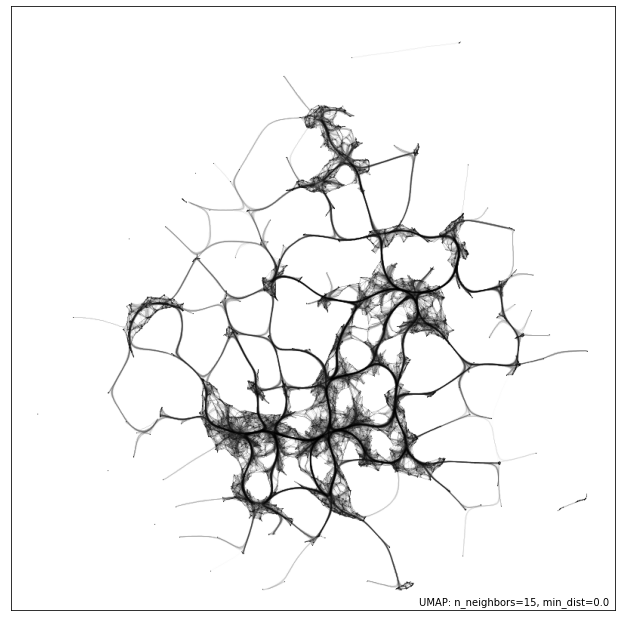

In [101]:
plot_hammer = umap.plot.connectivity(umap_reduced, edge_bundling='hammer')